# Keras - Tensorflow cơ bản
## Các bước thực hiện 1 bài toán - chương trình
1. Chuẩn bị data
* Chuẩn bị  - chuẩn hoá data
* Khảo sát dữ liệu
* Tiền xử lý
2. Tạo model (Mô hình Neural Network)
* Khai báo
* Biên dịch (Compile)

3. Train (Huấn luyện)
* Fitting (áp dụng các dữ liệu đã có đưa vào mô hình để giải, tìm ra các bộ thông số)  
* Đánh giá mô hình, đánh giá quá trình fitting (tune hyperparameters)
* Test thử

4. Lưu và load mô hình đã train để sử dụng cho các ứng dụng của mình


# Ví dụ 1: Phân loại bộ dữ liệu Fashion MNIST

## Bước 0 - Gọi thư viện

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
keras.__version__

'2.12.0'

## Bước 1. Dữ liệu

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train_full.shape

(60000, 28, 28)

In [ ]:
x_train_full.dtype

dtype('uint8')

In [ ]:
x_train_full[5,:,:]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

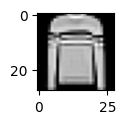

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(x_train_full[5,:,:],'gray')

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankel boot"]

In [ ]:
y_train_full[5]

2

In [ ]:
class_names[y_train_full[5]]

'Pullover'

In [ ]:
# Chuẩn hoá dữ liệu
# Dữ liệu đang từ 0 - 255 chuyển thành 0 - 1
# Tách dữ liệu train_full thành dữ liệu đem train và dữ liệu validation
x_valid, x_train = x_train_full[:5000] / 255.0 , x_train_full[5000:]/ 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Bước 2: Tạo mô hình  
Keras/ TF có 3 cách tạo 1 mô hình
* Dùng Sequential
* Dùng Functional API
* Dùng sub-class (Pytorch - gần giống)


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [ ]:
# Tạo mô hình bằng phương pháp dùng sequential API
model = models.Sequential()
model.add(layers.Flatten(input_shape=[28, 28]))
model.add(layers.Dense(300, activation = 'relu'))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model = model = models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(300, activation = 'relu'),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

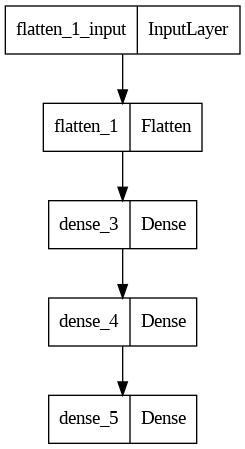

In [ ]:
plot_model(model)

In [ ]:
# Dùng Function API
input = layers.Input(shape = (28,28) )
flatten = layers.Flatten()(input)
hidden_1 = layers.Dense(300, activation = 'relu')(flatten)
hidden_2 = layers.Dense(100, activation = 'relu')(hidden_1)
output = layers.Dense(10, activation = 'softmax')(hidden_2)
model_2 = keras.Model(inputs=[input], outputs=[output])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

## Bước 3: Fit mô hình


In [ ]:
history = model.fit(x_train, y_train, epochs = 30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7277 - accuracy: 0.7609 - val_loss: 0.5110 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4876 - accuracy: 0.8304 - val_loss: 0.4401 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4418 - accuracy: 0.8444 - val_loss: 0.4365 - val_accuracy: 0.8478
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4147 - accuracy: 0.8552 - val_loss: 0.4421 - val_accuracy: 0.8400
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3957 - accuracy: 0.8608 - val_loss: 0.3827 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3785 - accuracy: 0.8653 - val_loss: 0.3910 - val_accuracy: 0.8630
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3659 - accuracy: 0.8713 - val_loss: 0.3728 - val_accuracy:

In [ ]:
import pandas as pd


<Axes: >

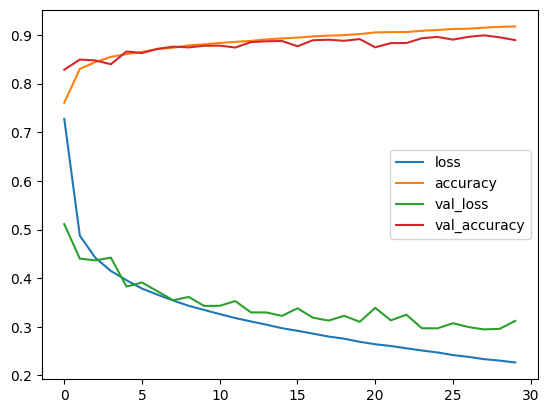

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
x_sample = x_test[:3]

In [ ]:
y_predict = model.predict(x_sample)

1/1 [==============================] - 0s 90ms/step


In [ ]:
y_predict

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
x_0 = x_sample[0,:,:]

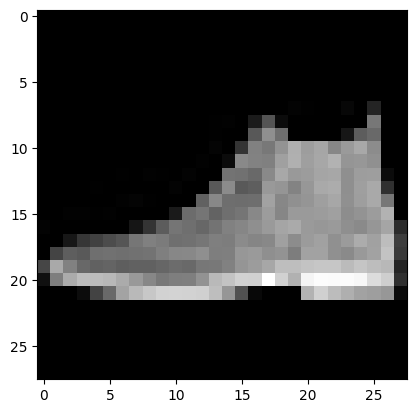

In [ ]:
plt.imshow(x_0,'gray')

In [ ]:
class_names[9]

'Ankel boot'

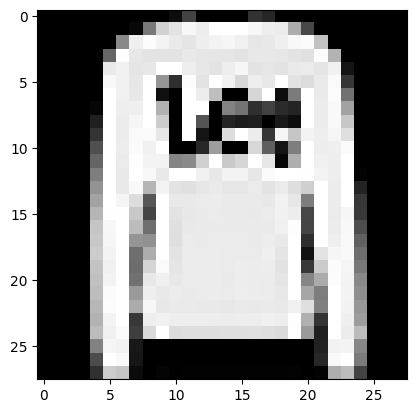

In [ ]:
x_1 = x_sample[1,:,:]
plt.imshow(x_1,'gray')

In [ ]:
class_names[2]

'Pullover'

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred_test = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
y_pred_class = (y_pred_test>0.5).astype(int)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_pred_class

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred_class = np.where(y_pred_class==1)[1]

In [ ]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.90      0.99      0.94      1000
           2       0.90      0.49      0.64      1000
           3       0.96      0.73      0.83      1000
           4       0.56      0.95      0.70      1000
           5       0.97      0.93      0.95      1000
           6       0.75      0.55      0.64      1000
           7       0.98      0.76      0.86      1000
           8       0.91      0.98      0.95      1000
           9       0.80      0.99      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.85      0.82      0.82     10000
weighted avg       0.85      0.82      0.82     10000



In [ ]:
# Train, validation, Test


In [ ]:
#Đem train: Train, Validation
# Kiểm tra sau cùng: Test

In [ ]:
model_class = {'Model': model, 'classes': class_names}

In [ ]:
import pickle as pkl

In [ ]:
pkl.dump(model_class, open('model_fashion_mnist.pkl', 'wb') )

In [ ]:
model_loaded = pkl.load(open('model_fashion_mnist.pkl', 'rb'))

In [ ]:
model_loaded

{'Model': <keras.engine.sequential.Sequential at 0x796d70b8fca0>,
 'classes': ['T-shirt',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankel boot']}

In [ ]:
pred = model_loaded['Model'].predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
model = model_loaded['Model']

In [ ]:
class_names = model_loaded['classes']

.h5

In [ ]:
import pandas as pd
dataframe = pd.read_csv('https://drive.google.com/file/d/1nk2WynqEEiAuaAZ3JQL_dlAb6-ZTxgUk/view?usp=sharing')

Github
